PCSE 503

Eric Miers

September 11, 2020

Code referenced from root_basic.ipynb - Dr. Edward Brash

Code referenced from root_find_complete.ipynb - Dr. Edward Brash

Code referenced from LinearRegression.ipynb - Dr. Edward Brash



# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3$
 
which has three real roots at $x=-2.5,0.5,1.5$.

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should fill an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.

d)	Modify the code created in part a) to allow for the possibility to find the roots of other polynomials or functions.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [48]:
# Create a generator function for the polynomial
def generatorFunction(x, *par):
  return (par[0]*x**3) + (par[1]*x**2) + (par[2]*x) + (par[3])

In [49]:
def rootBisection(xData, yData, xLow, xHigh, nPoints, nSearch, *par, xStep=None, yStep=None, nRootsExpected=None):
  # calculate the number of slices
  nIter = nPoints/nSearch

  # use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
  yComp = yData[0]
  nRootsFound = 0

  # data structures to hold roots
  xRoots = []
  yRoots = []


  # Start timer before root searching begins
  start = time.time()

  # Loop over the slices
  for i in range(0, int(nIter)):

    # Begin at the right most data point in the slice
      y = yData[nSearch*i]
      
      # Check to see if we got lucky and landed on an exact zero of the function
      if (y==0):
          print ("Found exact root at x = %f\n" % xData[nSearch*i])
          xRoots.append(xData[nSearch*i])
          yRoots.append(0.0)
          nRootsFound += 1
          
      # Otherwise, check to see if there is a root in between the left and right comparison points
      elif (y * yComp  < 0.0):
          # There is a root in the interval, so apply Newton's algorithm / bisection method
          #
          # First, get the x-values of the left and right ends of the slice
          xLow = xData[nSearch*(i-1)]
          xHigh = xData[nSearch*i]
          # define a "tolerance" at which point we will say we have found a zero
          epsilon = 1.48E-8
          
          diff = float('inf') #1.0E12
          while (diff > epsilon):
              # Calculate the function values at the left, right, and midpoints of the slice
              fa = generatorFunction(xLow, *par)
              fb = generatorFunction(xHigh, *par)
              xMid = (xHigh + xLow)/2.0
              fc = generatorFunction(xMid, *par)
              
              # Decide if the root is in the left half or right half of the interval, and redefine
              # the x interval accordingly
              product = fa * fc
              if (product < 0):
                  xHigh = xMid
              else:
                  xLow = xMid

              # update the difference value
              diff = np.abs(fc)

          print ("Found root at x = %f\n" % xMid)
          xRoots.append(xMid)
          yRoots.append(0.0)
          nRootsFound += 1
          
          # move to the next slice
          yComp = y
      else:
          # move to the next slice
          yComp = y
  
  if isinstance(xStep, list):
    xStep.append(nSearch)

  # Get the endtime for the algorithm
  end = time.time()
  timeEJB = float(end - start)

  if nRootsExpected and nRootsFound == nRootsExpected:
    yStep.append(1000.0*(timeEJB))
  elif nRootsExpected:
    yStep.append(30)

  # Return all of the data from the algorithm
  return (xRoots, yRoots, xStep, yStep, nRootsFound, timeEJB)

In [51]:
# PART A - Find the roots of the given function using the bisection alogirthm

# Set the x limits and number of points, calculate the interval
xLow = -4.0
xHigh = 4.0
nPoints = 1e4

dx = (xHigh - xLow) / nPoints

functionCoefficients = [1.0, 0.40, -4.05, 1.80] # f(x) = x^3 + 0.40x^2 -4.05x + 1.80
par = np.array(functionCoefficients)

# Define the data arrays (x and y)
xData = np.arange(xLow, xHigh, dx)
yData = generatorFunction(xData, *par)

# Define the size of the "slices" in x in which we will look for roots.
nSearch = 1000

# Run the bisection algorthm using our setup
rootStats = rootBisection(xData, yData, xLow, xHigh, nPoints, nSearch, *par)

print("Total number of roots found: %d\n" % rootStats[4])
print("Runtime: {}".format(rootStats[5]))

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found: 3

Runtime: 0.0017671585083007812


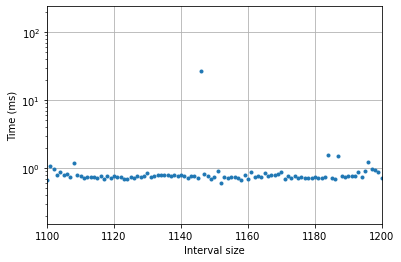

In [52]:
# PART B - Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.

nRootsExpected = 3
xStep = []
yStep = []

for nSearch in range(1, int(nPoints)):
  rootStats = rootBisection(xData, yData, xLow, xHigh, nPoints, nSearch, *par, xStep=xStep, yStep=yStep, nRootsExpected=nRootsExpected)
  xStep = rootStats[2]
  yStep = rootStats[3]

# Clean up the console for the plot
from IPython.display import clear_output
clear_output()

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
axs.plot(xStep, yStep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1100,1200)
plt.show()


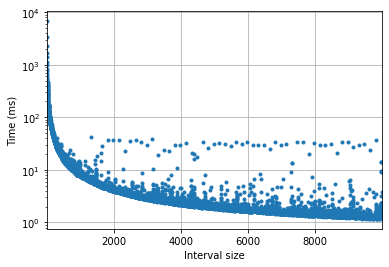

In [53]:
# PART C - Deduce Source of Patterns

# Set the x limits and number of points, calculate the interval
xLow = -4.0
xHigh = 4.0
nPoints = 1e7

dx = (xHigh - xLow) / nPoints

functionCoefficients = [1.8, 0.30, -4.20, 1.50] 
par2 = np.array(functionCoefficients)

# Define the data arrays (x and y)
xData = np.arange(xLow, xHigh, dx)
yData = generatorFunction(xData, *par2)

# Define the size of the "slices" in x in which we will look for roots.
nSearch = 1000
nRootsExpected = 3
xStep = []
yStep = []

for nSearch in range(1, int(10000)):
  rootStats = rootBisection(xData, yData, xLow, xHigh, nPoints, nSearch, *par2, xStep=xStep, yStep=yStep, nRootsExpected=nRootsExpected)
  xStep = rootStats[2]
  yStep = rootStats[3]

# Clean up the console for the plot
from IPython.display import clear_output
clear_output()

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
axs.plot(xStep, yStep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(min(xStep),max(xStep))
plt.show()

The algorithm's runtime behavior is logarithmic, with the runtime converging to 1ms as the number of slices increase. This behavior makes sense as the number of slices increase, there are fewer iterations required to reach the root threshold as the distance between a and b are reduced. As the number of data points increases, it takes a larger number of slices for the algorithm to converge. The initial runtime also increases by a power ten as the number of data points increase by a power of ten.

In [55]:
# PART D - Modify code to find roots of any polynomial

# Create a generator function for the polynomial
def generatorFunctionNew(x, coef, pow):

  # Make sure each term has an associated power
  if len(coef) != len(pow):
    print("ERROR - Length of the power array must match the length of the coefficient array")
    return

  # Compute f(x)
  fX = 0.0
  for i in range(0, len(coef)):
    fX += coef[i] * x**pow[i]

  return fX


def rootBisectionNew(xData, yData, xLow, xHigh, nPoints, nSearch, coef, pow, xStep=None, yStep=None, nRootsExpected=None):
  # calculate the number of slices
  nIter = nPoints/nSearch

  # use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
  yComp = yData[0]
  nRootsFound = 0

  # data structures to hold roots
  xRoots = []
  yRoots = []


  # Start timer before root searching begins
  start = time.time()

  # Loop over the slices
  for i in range(0, int(nIter)):

    # Begin at the right most data point in the slice
      y = yData[nSearch*i]
      
      # Check to see if we got lucky and landed on an exact zero of the function
      if (y==0):
          print ("Found exact root at x = %f\n" % xData[nSearch*i])
          xRoots.append(xData[nSearch*i])
          yRoots.append(0.0)
          nRootsFound += 1
          
      # Otherwise, check to see if there is a root in between the left and right comparison points
      elif (y * yComp  < 0.0):
          # There is a root in the interval, so apply Newton's algorithm / bisection method
          #
          # First, get the x-values of the left and right ends of the slice
          xLow = xData[nSearch*(i-1)]
          xHigh = xData[nSearch*i]
          # define a "tolerance" at which point we will say we have found a zero
          epsilon = 1.48E-8
          
          diff = float('inf') #1.0E12
          while (diff > epsilon):
              # Calculate the function values at the left, right, and midpoints of the slice
              fa = generatorFunctionNew(xLow, coef, pow)
              fb = generatorFunctionNew(xHigh, coef, pow)
              xMid = (xHigh + xLow)/2.0
              fc = generatorFunctionNew(xMid, coef, pow)
              
              # Decide if the root is in the left half or right half of the interval, and redefine
              # the x interval accordingly
              product = fa * fc
              if (product < 0):
                  xHigh = xMid
              else:
                  xLow = xMid

              # update the difference value
              diff = np.abs(fc)

          print ("Found root at x = %f\n" % xMid)
          xRoots.append(xMid)
          yRoots.append(0.0)
          nRootsFound += 1
          
          # move to the next slice
          yComp = y
      else:
          # move to the next slice
          yComp = y
  
  if isinstance(xStep, list):
    xStep.append(nSearch)

  # Get the endtime for the algorithm
  end = time.time()
  timeEJB = float(end - start)

  if nRootsExpected and nRootsFound == nRootsExpected:
    yStep.append(1000.0*(timeEJB))
  elif nRootsExpected:
    yStep.append(30)

  # Return all of the data from the algorithm
  return (xRoots, yRoots, xStep, yStep, nRootsFound, timeEJB)


# Set the x limits and number of points, calculate the interval
xLow = -4.0
xHigh = 4.0
nPoints = 1e4

dx = (xHigh - xLow) / nPoints

# f(x) = 13.7x^5 + 3x^4 + 2.5x^3 - x^2 + 3x - 7,  root(s): x = 0.752
functionCoefficients = [13.7, 3.0, 2.5, -1.0, 3.0, -7]
functionPowers = [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
coef = np.array(functionCoefficients)
pow = np.array(functionPowers)

# Define the data arrays (x and y)
xData = np.arange(xLow, xHigh, dx)
yData = generatorFunctionNew(xData, coef, pow)

# Define the size of the "slices" in x in which we will look for roots.
nSearch = 1000

# Run the bisection algorthm using our setup
rootStats = rootBisectionNew(xData, yData, xLow, xHigh, nPoints, nSearch, coef, pow)

print("Total number of roots found: %d\n" % rootStats[4])
print("Runtime: {}".format(rootStats[5]))

Found root at x = 0.751765

Total number of roots found: 1

Runtime: 0.0006885528564453125


## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Linear Regression to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy.optimize import curve_fit

# PART A - Load the Dataset

# Load the dataset as a pandas frame
url = "http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html"
dfs =  pd.read_html(url)

# We're interested int the second table on the page, rename columns for ease of use
table = dfs[1]
table = table.rename(columns={"Density - ρ - (kg/m3)": "Density", "Geo potential Altitude above Sea Level - h - (m)": "Altitude"})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
# PART B - Create a custom Fit function

# Create our custom fit function
def fitFunction(x, *paramlist):
  return paramlist[0]*np.exp(paramlist[1]*x + paramlist[2]*np.sqrt(x))

In [59]:
# PART C - Determine Parameters and their Uncertainties

init_vals = [0.0 for x in range(3)]
x = np.array(table['Density'])
y = np.array(table['Altitude'])
popt, pcov = curve_fit(fitFunction, x, y, p0=init_vals)

print("Coefficients (from curve_fit)")
print("{}\n".format(popt))
print("Covariance Matrix (from curve_fit)")
print("{}\n".format(pcov))

# Print the parameters and their uncertainties
from math import sqrt
print("A = {} +- {}".format(popt[0], sqrt(pcov[0][0])))
print("B = {} +- {}".format(popt[1], sqrt(pcov[1][1])))
print("C = {} +- {}".format(popt[2], sqrt(pcov[2][2])))

Coefficients (from curve_fit)
[ 6.99084729e+04  2.84513773e+00 -5.82953505e+00]

Covariance Matrix (from curve_fit)
[[ 9.50176786e+06  1.43819299e+03 -1.44067875e+03]
 [ 1.43819299e+03  1.00474865e+00 -7.23497856e-01]
 [-1.44067875e+03 -7.23497856e-01  6.50366218e-01]]

A = 69908.47285902807 +- 3082.493772107582
B = 2.845137727987083 +- 1.002371514628775
C = -5.829535053871819 +- 0.8064528617797108


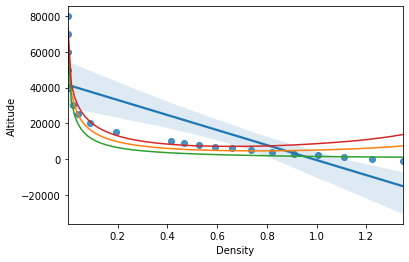

In [60]:
# PART D -  Plot the data with 95% CI

import seaborn as sns
sns.regplot('Density', 'Altitude', table, ci=95)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitFunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

The model appears to be a pretty close fit, and is significantly better than the linear regression model. However, The model does appear to skew away from the data at around 1 kg/m3 as the data points begin trending below the lower uncertainty curve. One thing that could be done is identifying and eliminating statistical outliers before fitting. Trying different models can help find a fit that represents the data closer through RMSE. The use of a predicitve model over a non-linear regression model might be able to develop a closer match to the data (but would require more data to learn trends, and you have to be more careful about not overfitting).